# Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

---

**Name**: Corpuz, Micki Laurren B.

**Section**: CPE22S3

**Submitted to**: Engr. Roman Richard

---

**Instructions:**

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

**Resources:**

- Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv

**Procedures:**

# 9.1 Introduction to Matplotlib
Getting Started with Matplotlib
We need matplotlib.pyplot for plotting.

In [292]:
import matplotlib.pyplot as plt
import pandas as pd

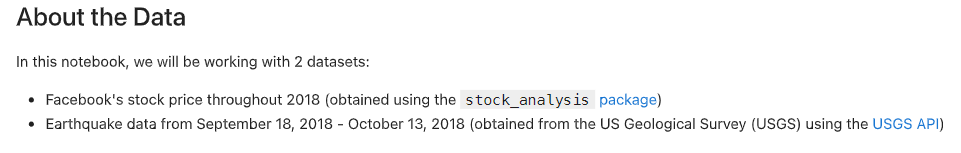

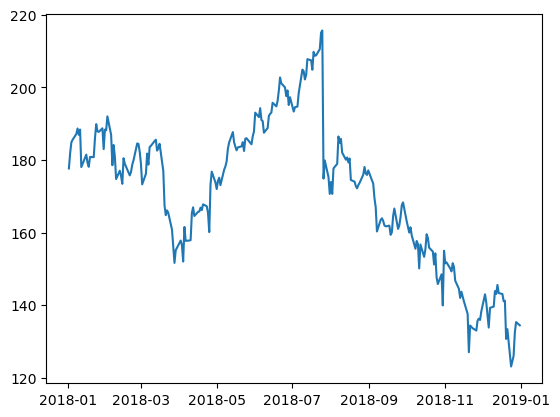

In [19]:
#Plotting Lines
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)
plt.show()

Since we are working in a Jupyter notebook, we can use the magic command %matplotlib inline once and not have to call plt.show() for each plot

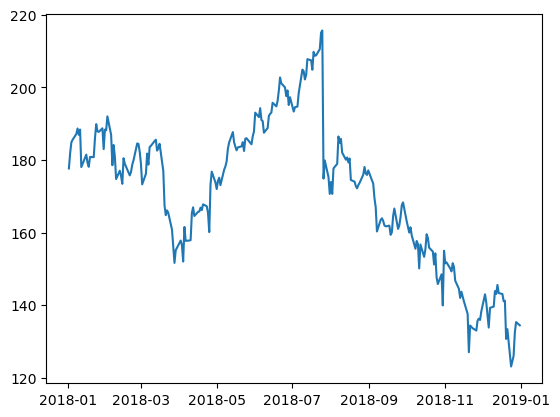

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    "fb_stock_prices_2018.csv", index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

## Scatter plots

We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with 'k--' or a red
scatter plot with 'ro' :

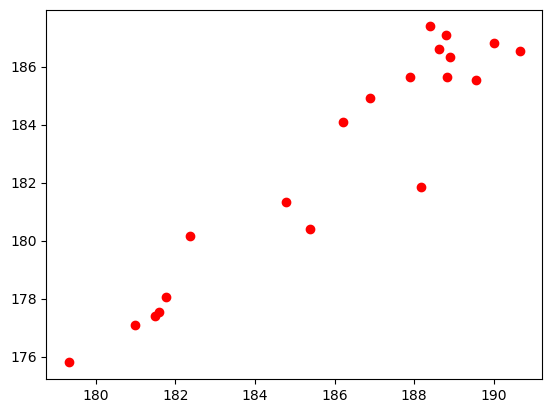

In [25]:
plt.plot('high', 'low', 'ro', data=fb.head(20))

## Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

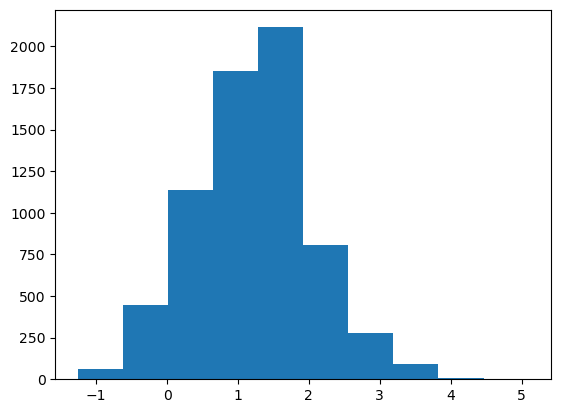

In [28]:
quakes = pd.read_csv('earthquakes-1.csv')
plt.hist(quakes.query('magType == "ml"').mag)

## Bin size matters
Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

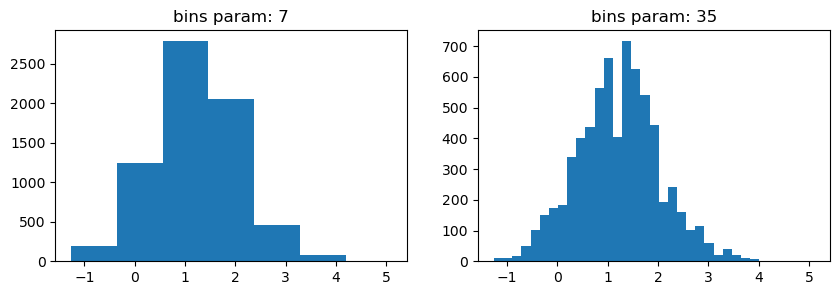

In [286]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

## Plot components
> Figure

Top-level object that holds the other plot components

In [35]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

#Axes
Individual plots contained within the Figure

#Creating subplots
Simply specify the number of rows and columns to create:

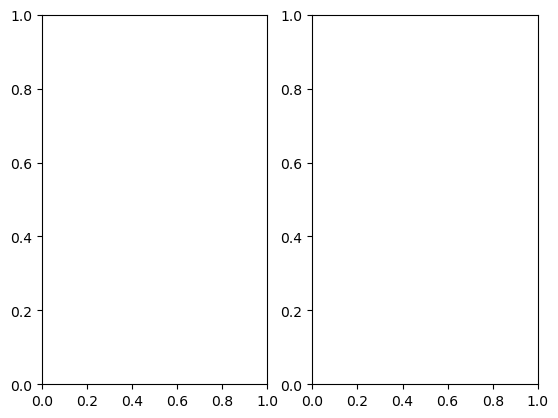

In [38]:
fig, axes = plt.subplots(1, 2)

As an alternative to using plt.subplots() we can add the Axes to the Figure on our own. This allows for some more complex layouts, such as picture in picture:

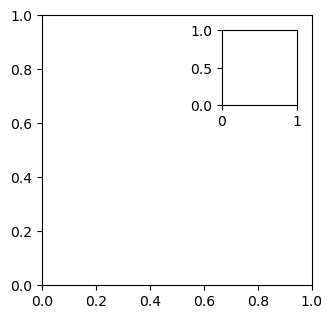

In [41]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

#Creating Plot Layouts with gridspec
We can create subplots with varying sizes as well:

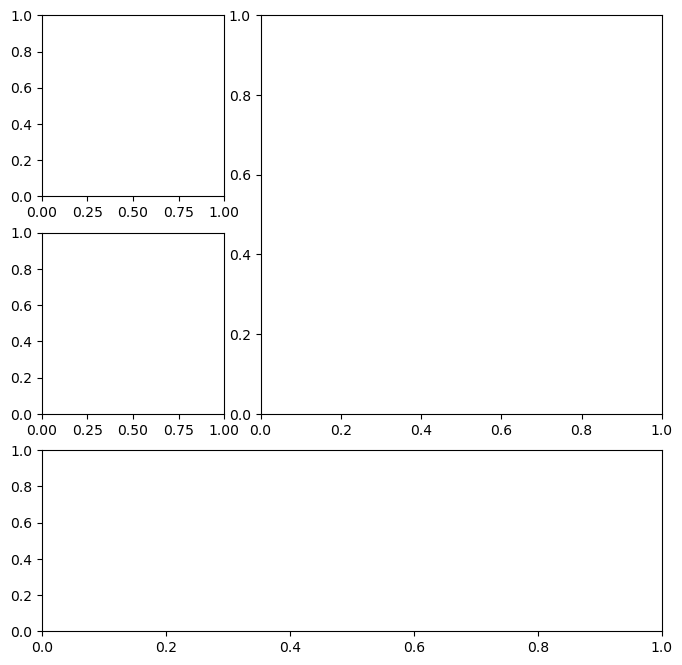

In [44]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

#Saving plots
Use plt.savefig() to save the last created plot. To save a specific Figure object, use its savefig() method.

In [47]:
fig.savefig('empty.png')

#Cleaning up
It's important to close resources when we are done with them. We use plt.close() to do so. If we pass in nothing, it will close the last plot, but we can pass the specific
Figure to close or say 'all' to close all Figure objects that are open. Let's close all the Figure objects that are open with plt.close() :

In [50]:
plt.close('all')

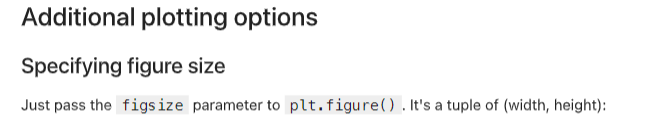

In [53]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

This can be specified when creating subplots as well:

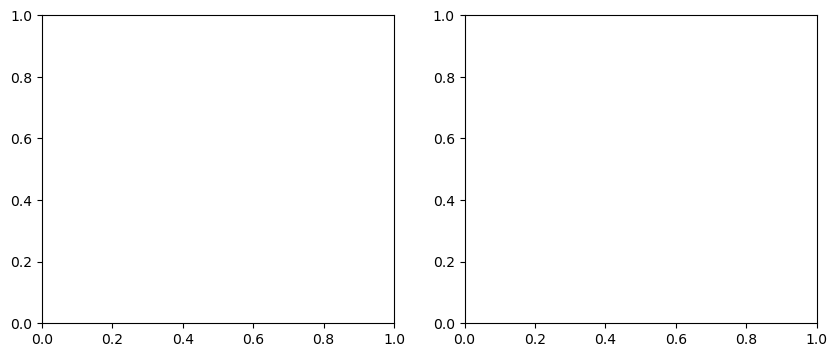

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#rcParamsIn

A small subset of all the available plot settings (shuffling to get a good variation of options):

In [59]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.formatter.use_locale',
 'boxplot.flierprops.markeredgewidth',
 'boxplot.showfliers',
 'contour.negative_linestyle',
 'date.autoformatter.month',
 'date.epoch',
 'figure.autolayout',
 'image.resample',
 'keymap.grid_minor',
 'legend.facecolor',
 'legend.labelcolor',
 'patch.facecolor',
 'text.parse_math',
 'webagg.open_in_browser',
 'xaxis.labellocation',
 'xtick.alignment',
 'xtick.labelcolor',
 'yaxis.labellocation',
 'ytick.minor.pad']

We can check the current default figsize using rcParams :

In [62]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):

In [65]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use rcdefaults() to restore the defaults:

In [68]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via pyplot :

In [71]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default

# **9.2 Plotting with Pandas**

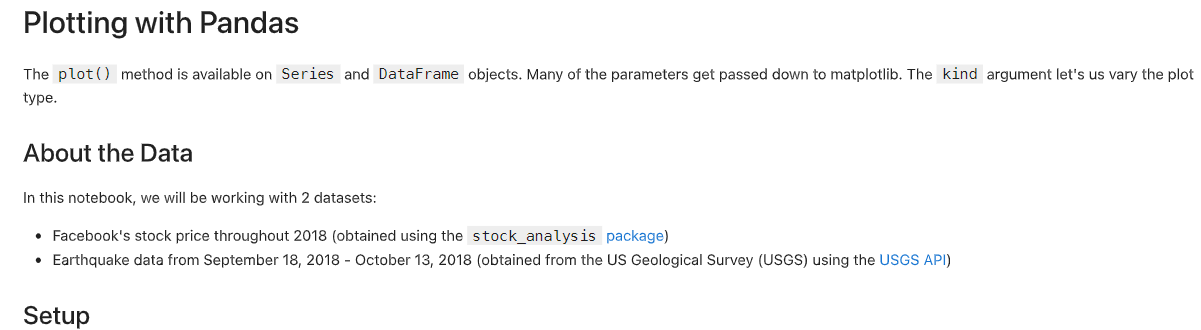

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes-1.csv')

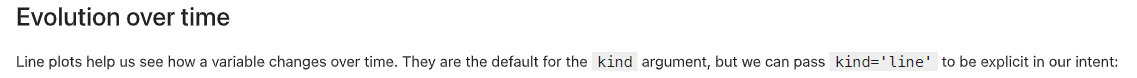

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

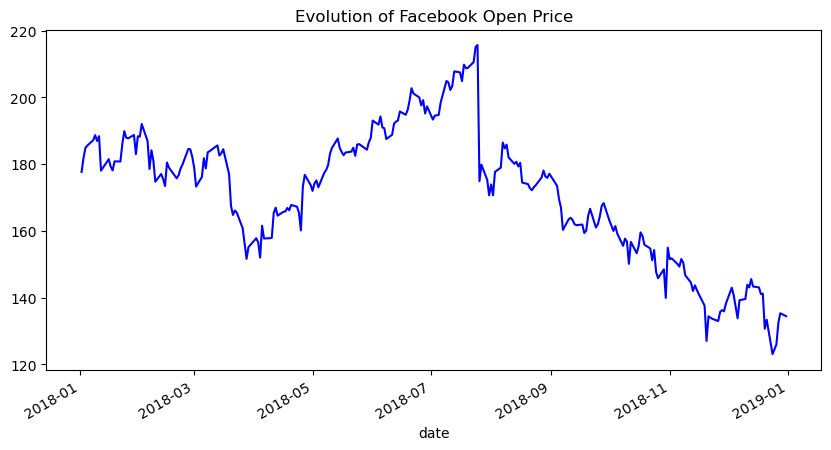

In [80]:
fb.plot(
kind='line',
y='open',
figsize=(10, 5),
style='b-',
legend=False,
title='Evolution of Facebook Open Price'
)

We provided the style argument in the previous example; however, we can use the color and linestyle arguments to get the same result:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

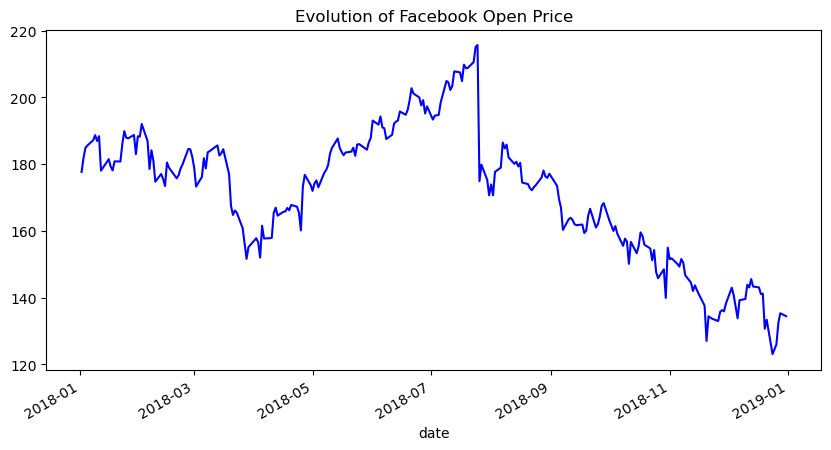

In [83]:
fb.plot(
kind='line',
y='open',
figsize=(10, 5),
color='blue',
linestyle='solid',
legend=False,
title='Evolution of Facebook Open Price'
)

We can also plot many lines at once by simply passing a list of the columns to plot:

<Axes: title={'center': 'Facebook OHLC Prices during 1st Week of Trading 2018'}, xlabel='date'>

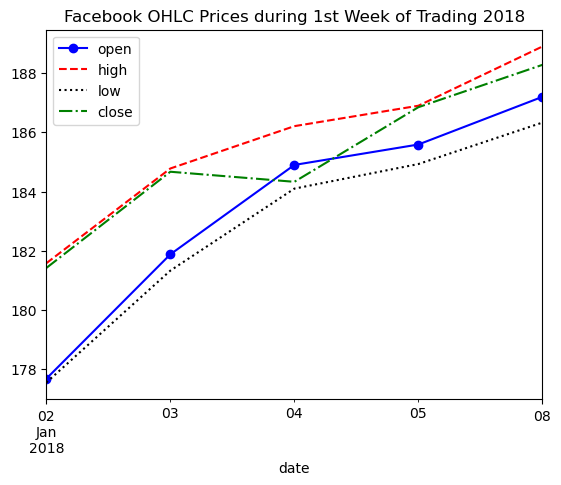

In [86]:
fb.iloc[:5,].plot(
  y=['open', 'high', 'low', 'close'],
  style=['b-o', 'r--', 'k:', 'g-.'],
  title='Facebook OHLC Prices during 1st Week of Trading 2018'
)

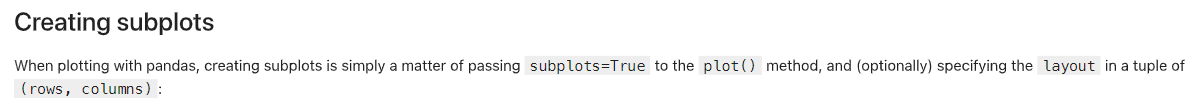

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

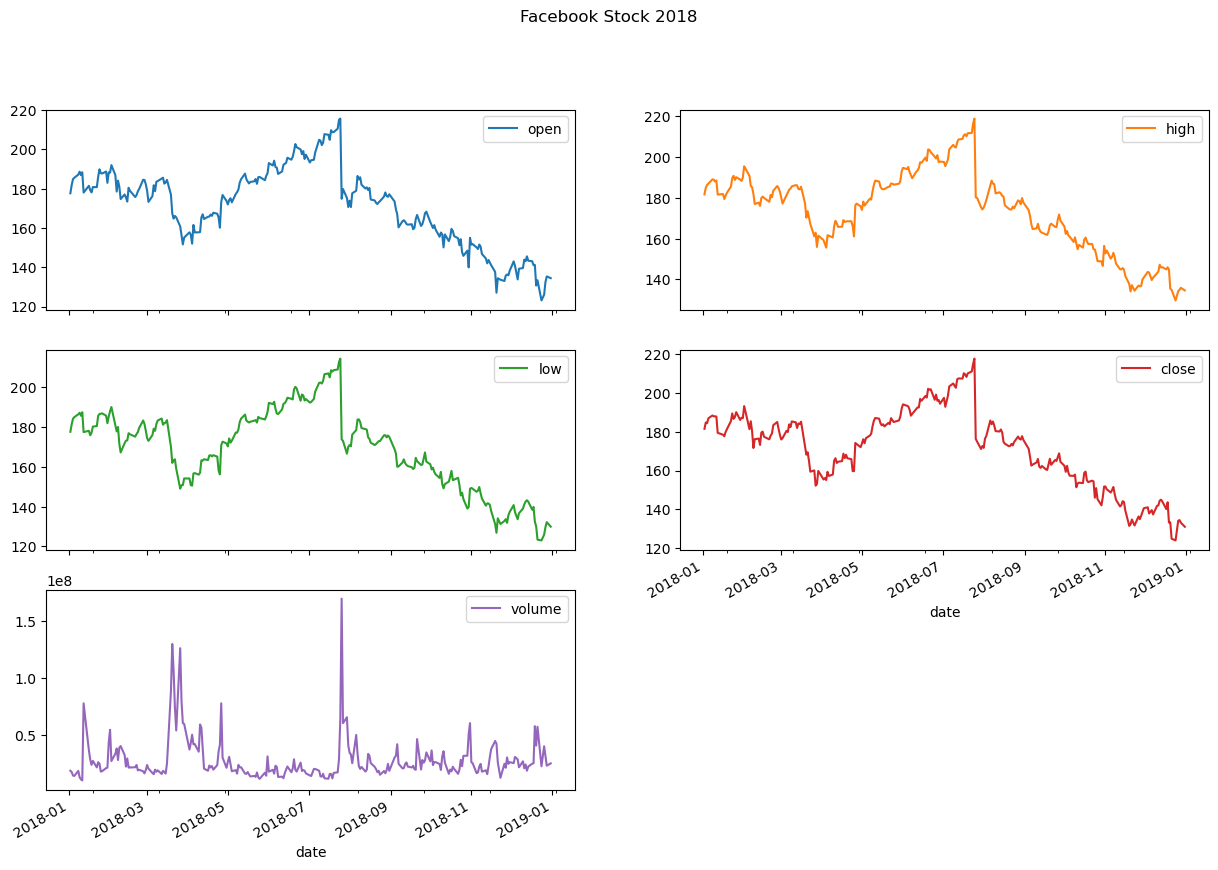

In [89]:
fb.plot(
kind='line',
subplots=True,
layout=(3,2),
figsize=(15,10),
title='Facebook Stock 2018'
)

#Visualizing relationships between variables

#Scatter plots
We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in kind='scatter' along with a column for the x-
axis and a column for the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

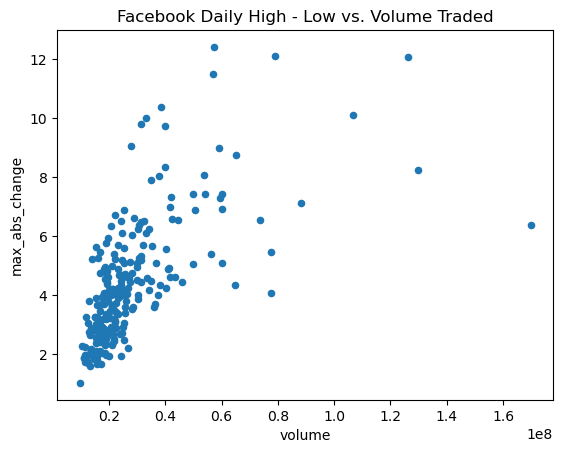

In [92]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. Volume Traded'
)

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in
logx=True :

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

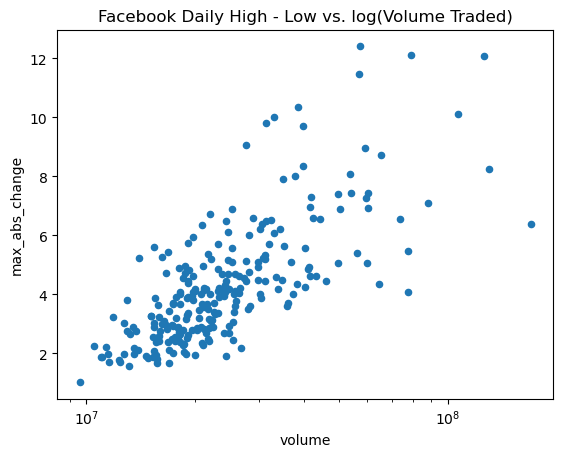

In [95]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True
)


With matplotlib, we could use plt.xscale('log') to do the same thing

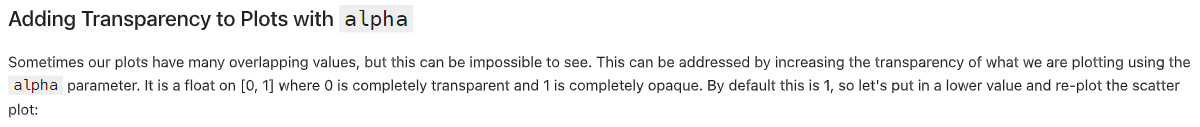

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

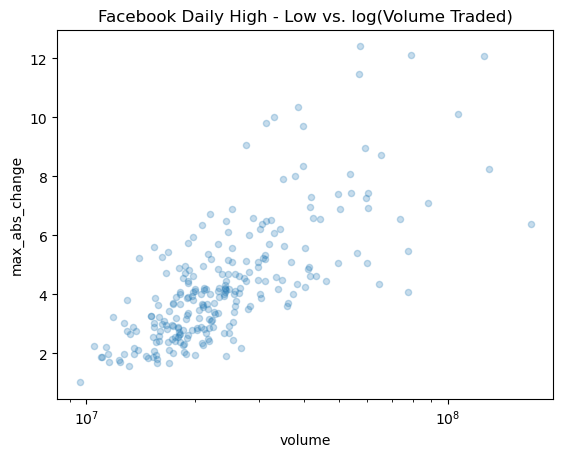

In [99]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True, alpha=0.25
)

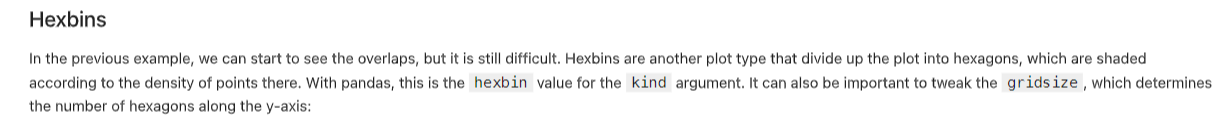

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

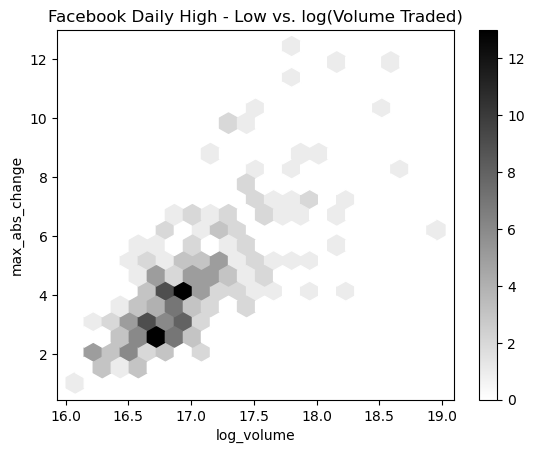

In [102]:
fb.assign(
log_volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).plot(
kind='hexbin',
x='log_volume',
y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
colormap='gray_r',
gridsize=20,
sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)

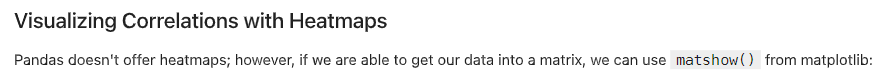

AttributeError: 'Colorbar' object has no attribute 'set_clim'

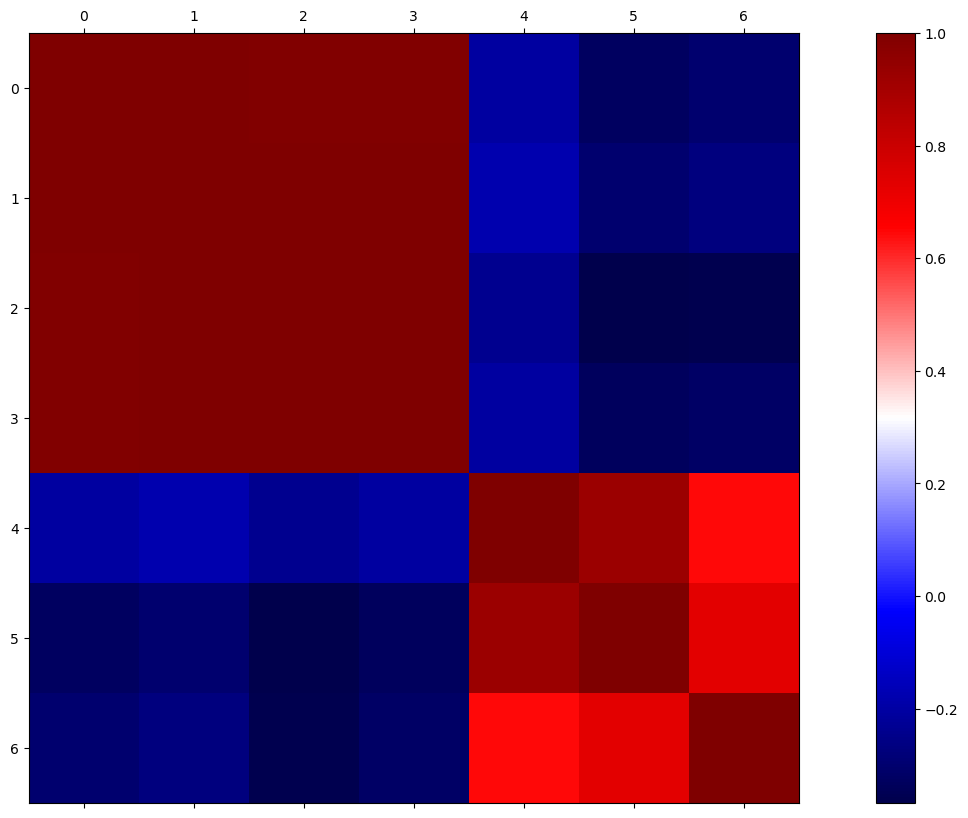

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))

fb_corr = fb.assign(
  log_volume=np.log(fb.volume),
  max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im).set_clim(-1, 1)
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

[Text(0, 0, 'open'),
 Text(0, 1, 'high'),
 Text(0, 2, 'low'),
 Text(0, 3, 'close'),
 Text(0, 4, 'volume'),
 Text(0, 5, 'log_volume'),
 Text(0, 6, 'max_abs_change')]

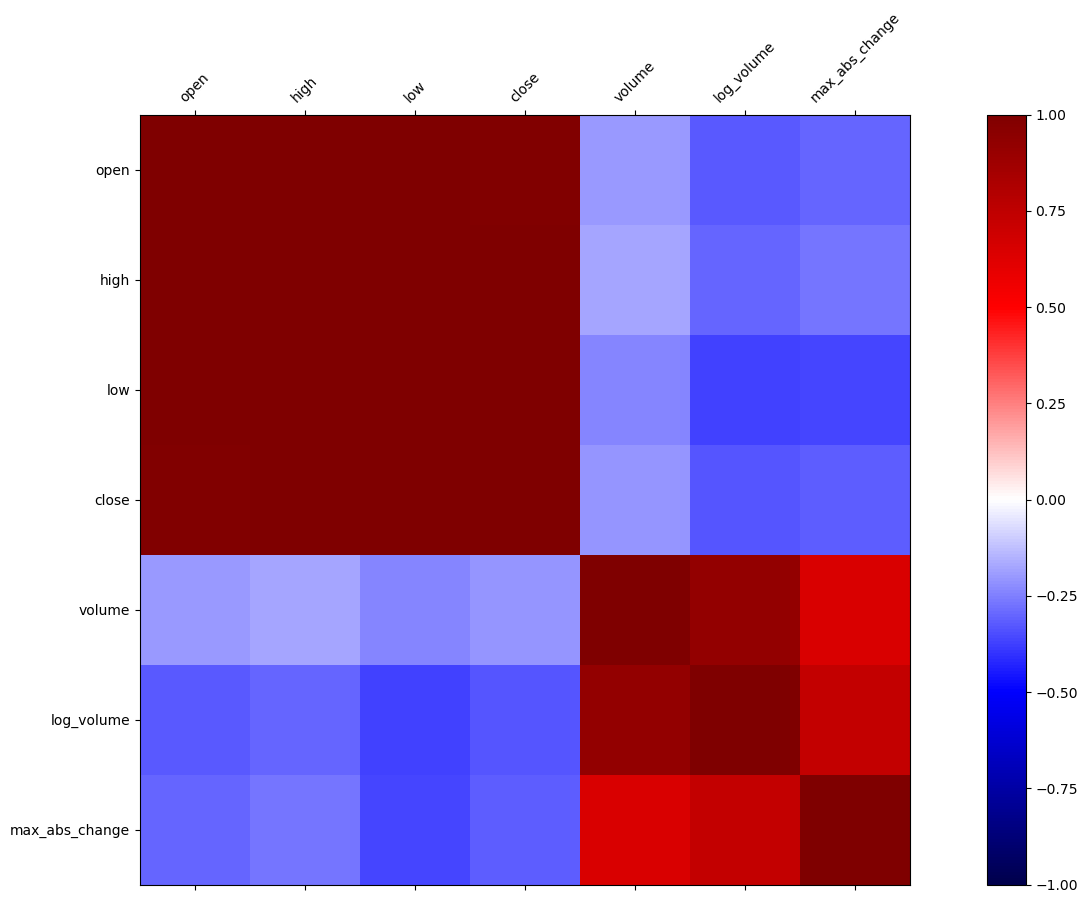

In [108]:
# Updated
fig, ax = plt.subplots(figsize=(20, 10))

fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
tick_positions = list(range(len(labels)))

ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

In [111]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

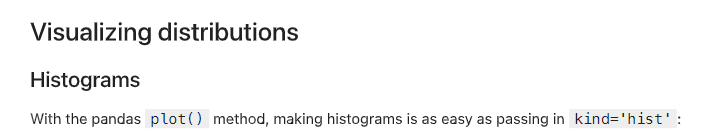

Text(0.5, 0, 'Volume traded')

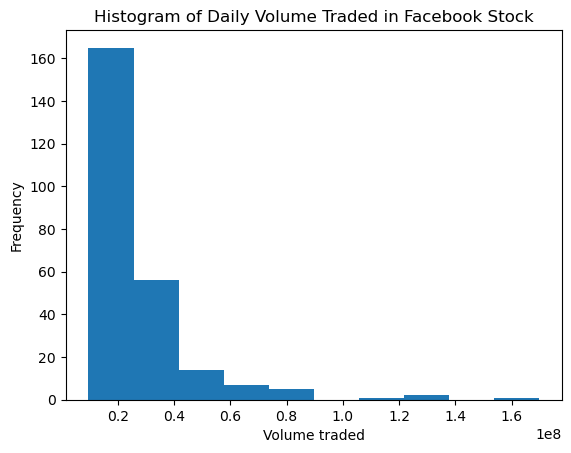

In [114]:
fb.volume.plot(
kind='hist',
title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

We can overlap histograms to compare distributions provided we use the alpha parameter. For example, let's compare the usage and magnitude of the various magTypes
in the data:

Text(0.5, 0, 'magnitude')

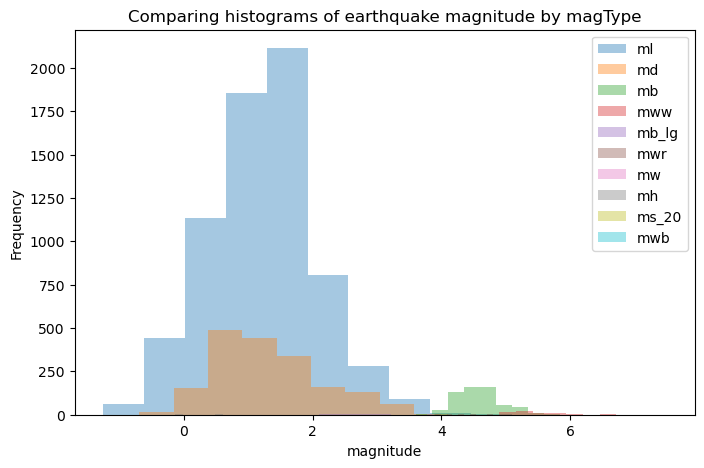

In [125]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4,
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
)
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

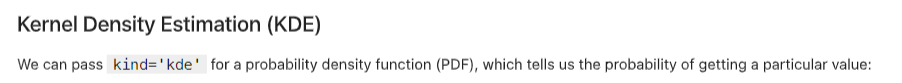

Text(0.5, 0, 'Price ($)')

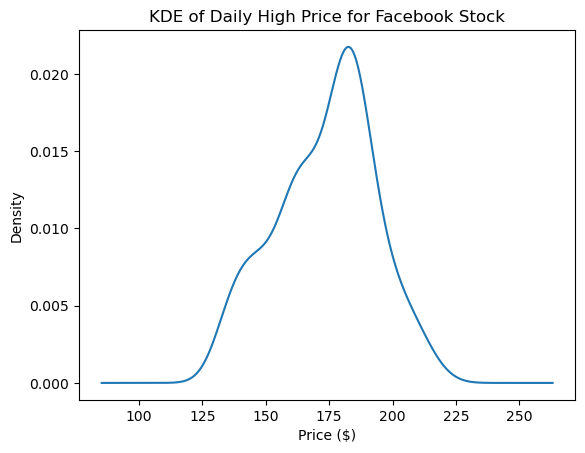

In [128]:
fb.high.plot(
kind='kde',
title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)')

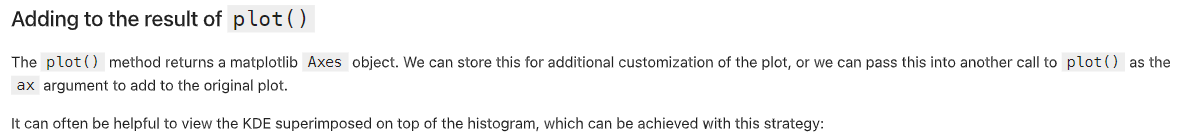

Text(0.5, 0, 'Price ($)')

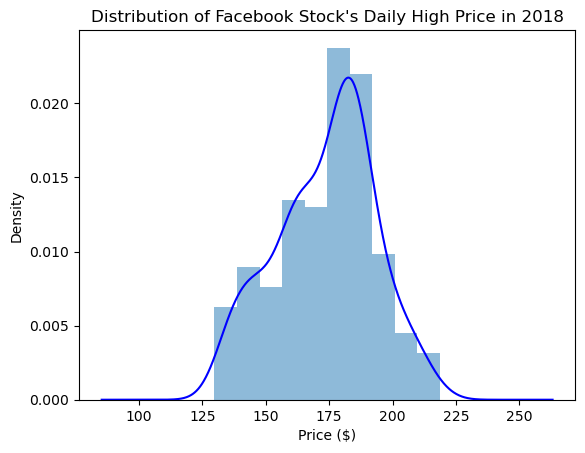

In [132]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

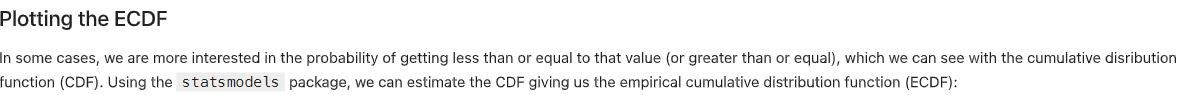

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

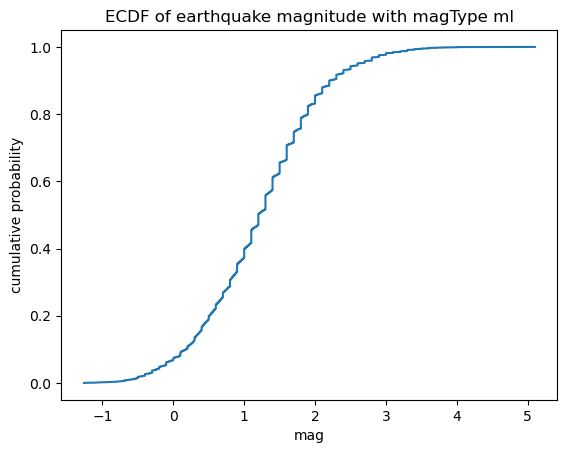

In [135]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label

plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the ml scale is 98%:

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

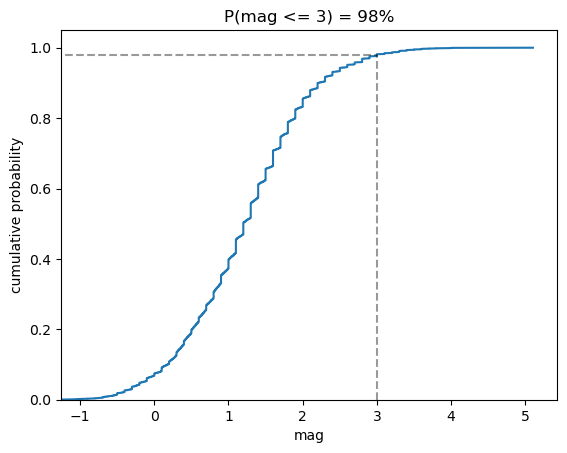

In [138]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
    [3, 3], [0, .98], 'k--',
    [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

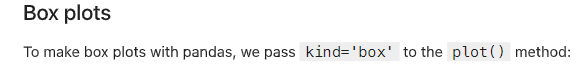

Text(0, 0.5, 'price ($)')

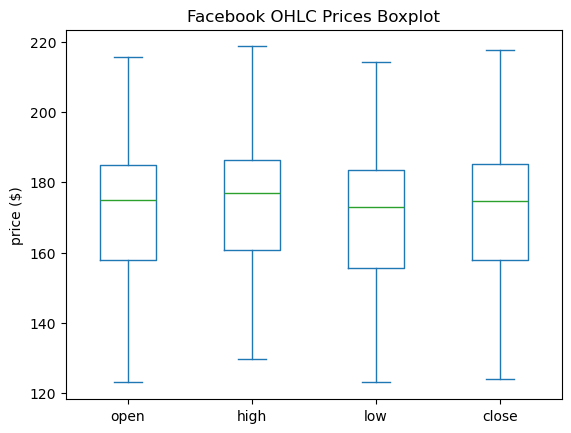

In [141]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)

This can also be combined with a groupby() :

C:\Users\micki\AppData\Local\Temp\ipykernel_23048\2255955200.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

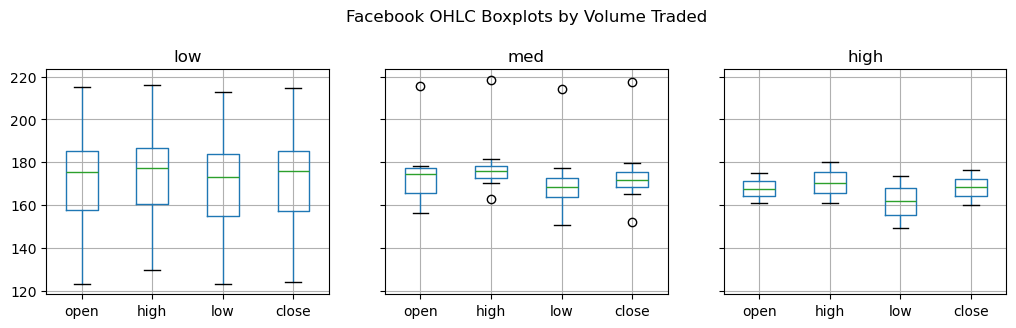

In [146]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

Text(0, 0.5, 'magnitude')

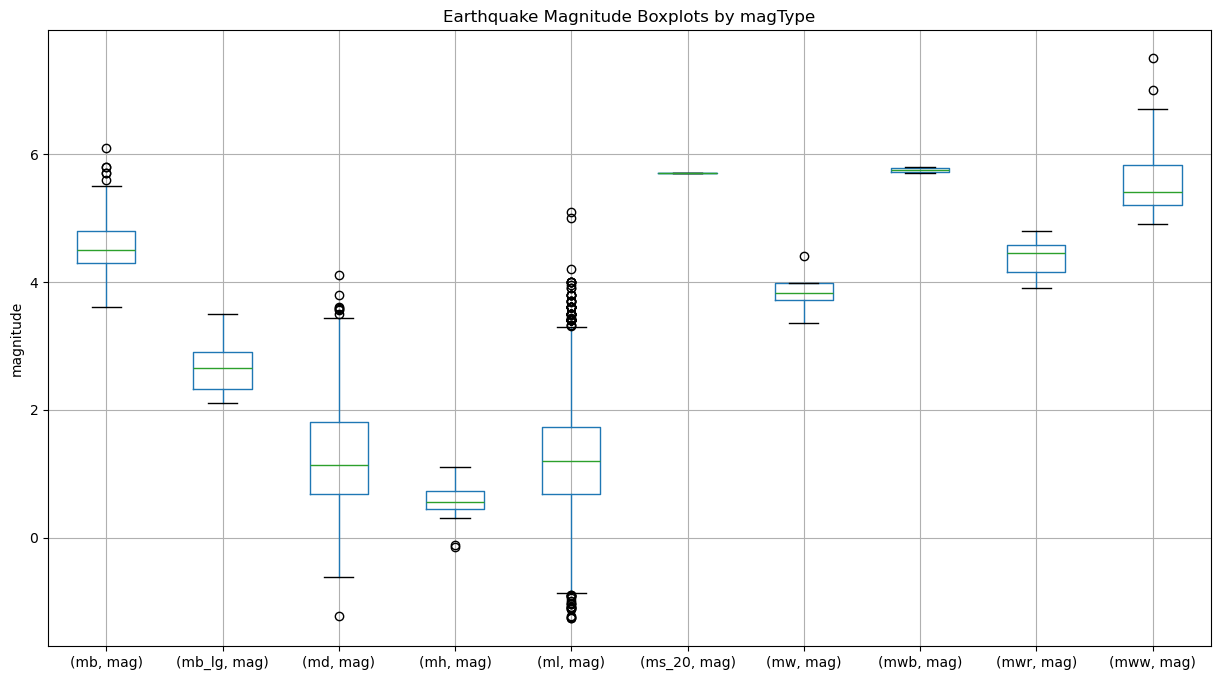

In [150]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

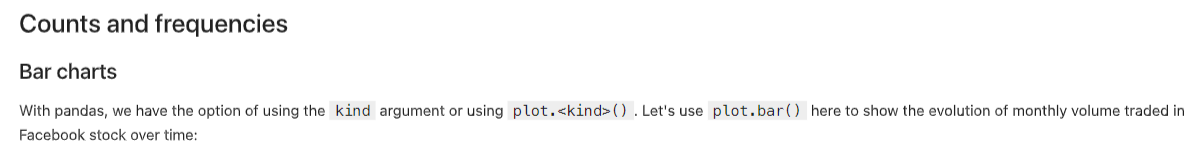

Text(0, 0.5, 'volume')

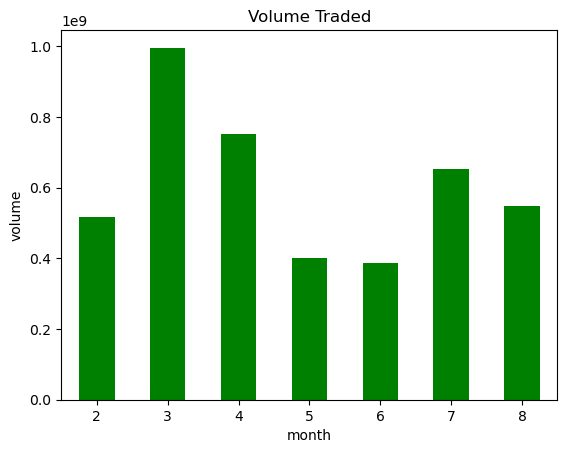

In [153]:
fb['2018-02':'2018-08'].assign(
    month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
    color='green', rot=0, title='Volume Traded'
)
plt.ylabel('volume') # label the y-axis (discussed in chapter 6)

Text(0.5, 0, 'earthquakes')

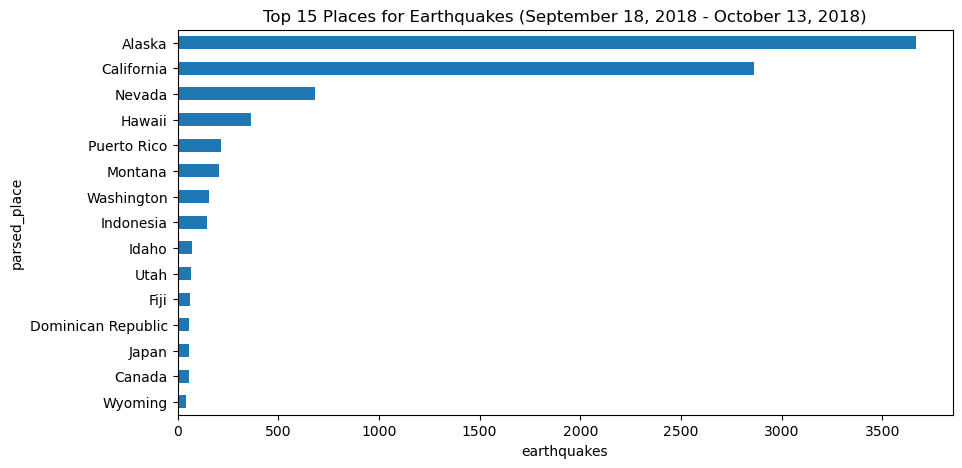

In [156]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '\
        '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'tsunamis')

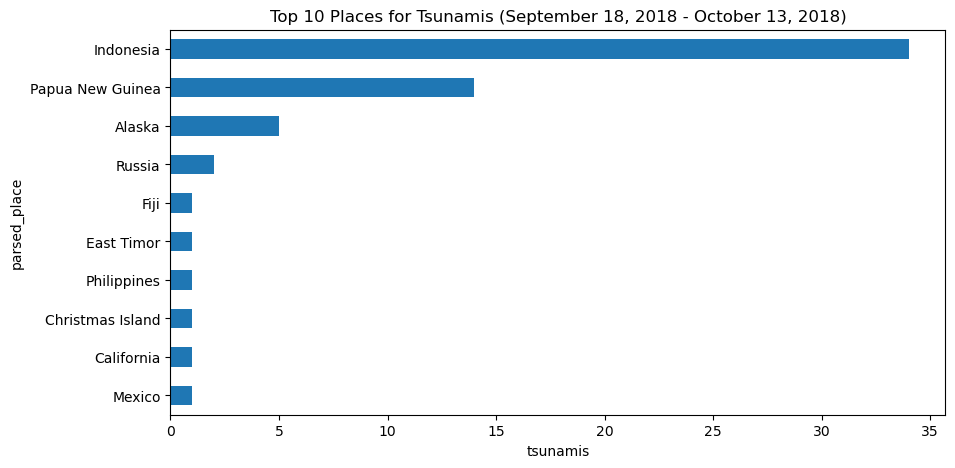

In [159]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 10 Places for Tsunamis '\
        '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

Text(0, 0.5, 'count')

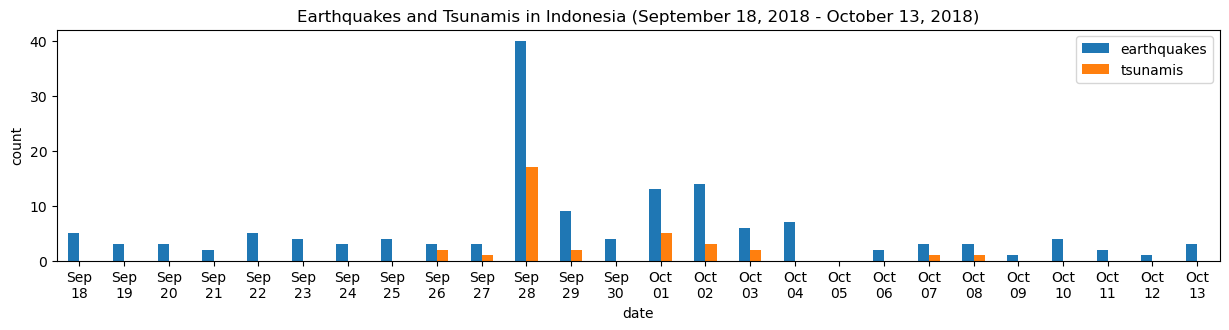

In [162]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
    label=['earthquakes', 'tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia '\
        '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Using the kind arugment for vertical bars when the labels for each bar are shorter:

Text(0, 0.5, 'earthquakes')

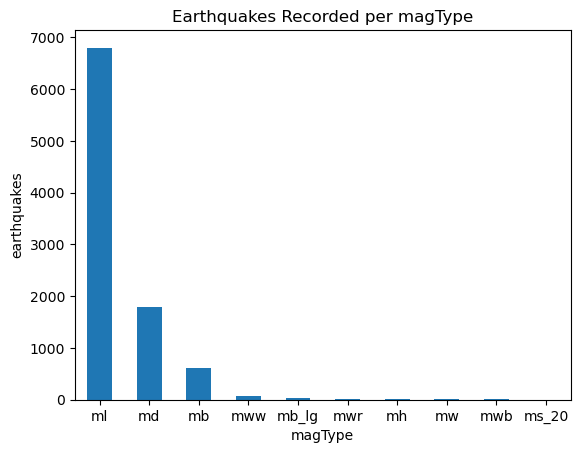

In [165]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

Top 4 places with earthquakes

Text(0, 0.5, 'earthquakes')

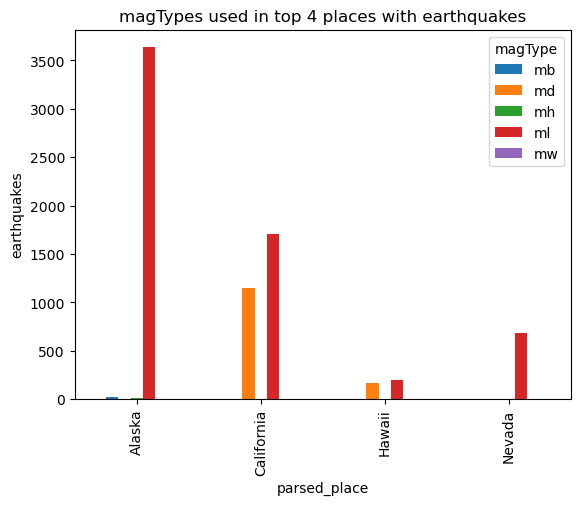

In [170]:
quakes[
    quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
    title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

**Stacked bar chart**

Text(0, 0.5, 'earthquakes')

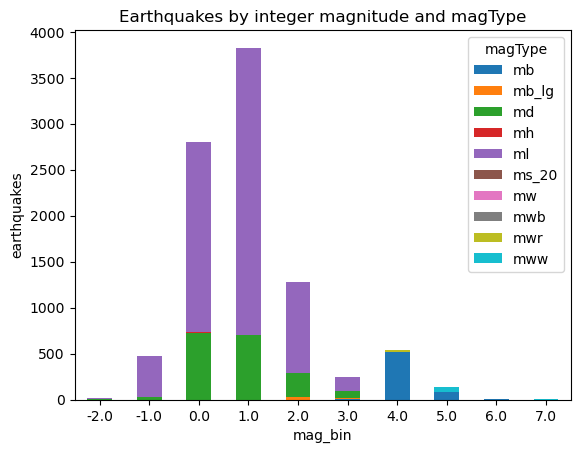

In [179]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0,
    title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

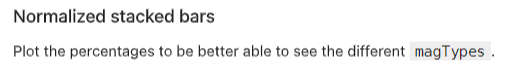

Text(0, 0.5, 'percentage')

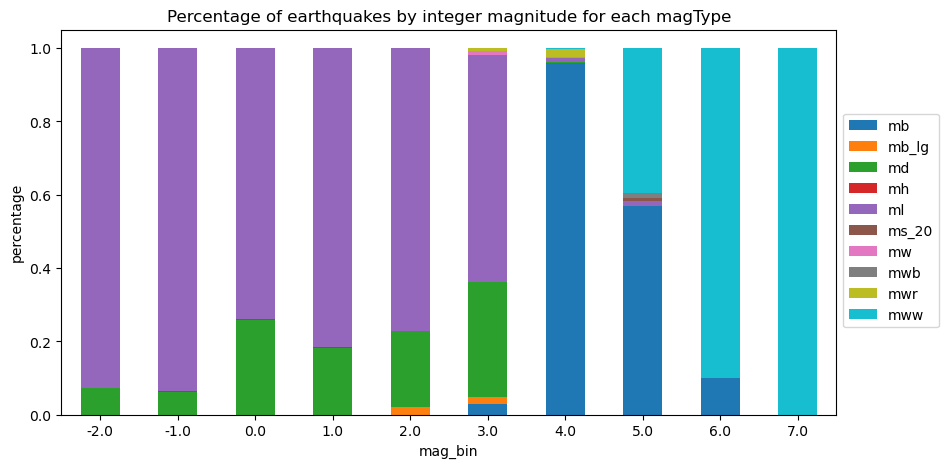

In [182]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)

# **9.3 Pandas Plotting Subpackage**

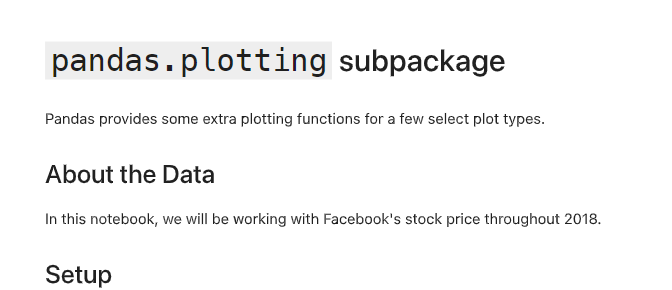

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

## Scatter matrix


array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

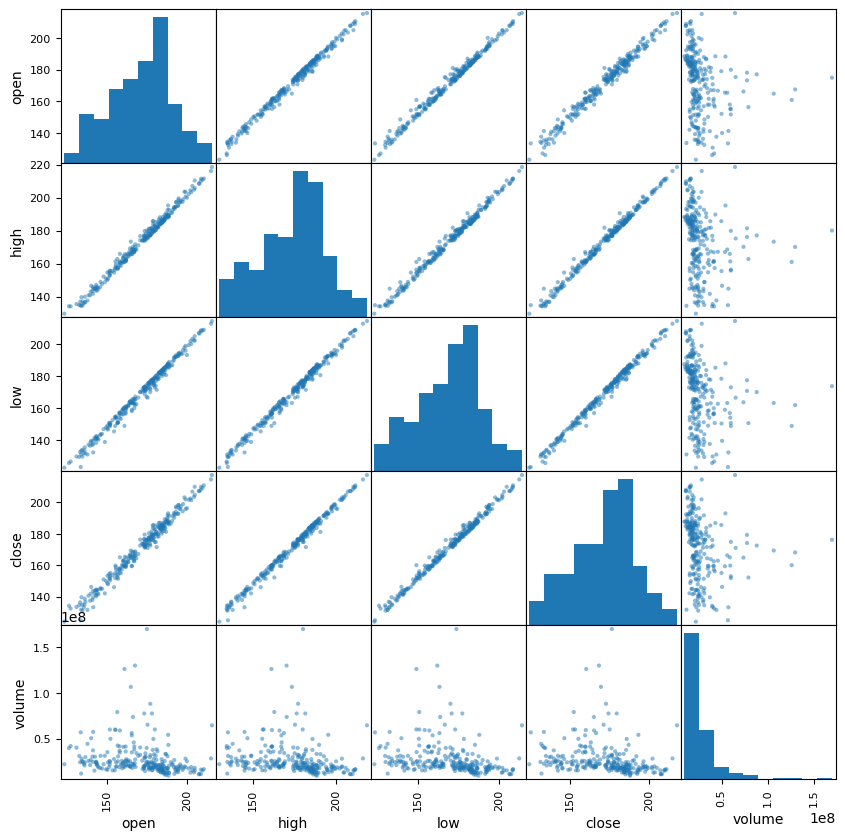

In [194]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

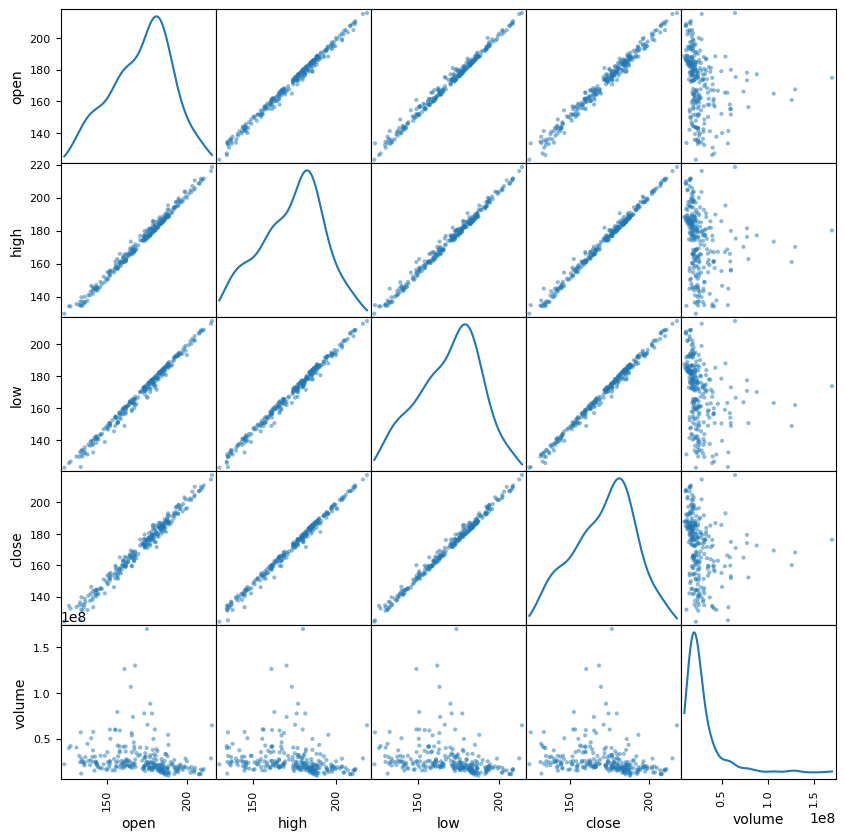

In [197]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

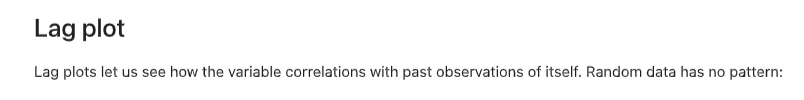

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

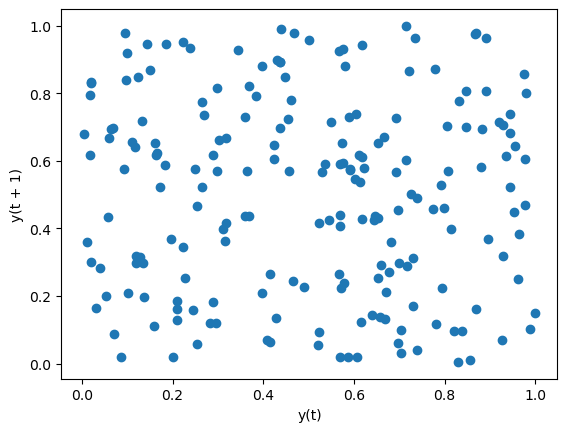

In [200]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

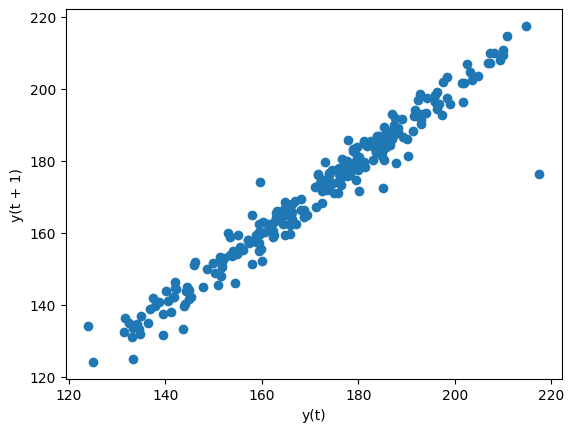

In [ ]:
lag_plot(fb.close)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

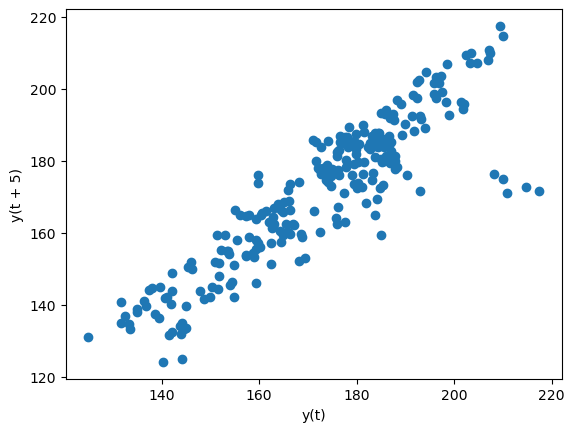

In [206]:
lag_plot(fb.close, lag=5)

## Autocorrelation plots

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

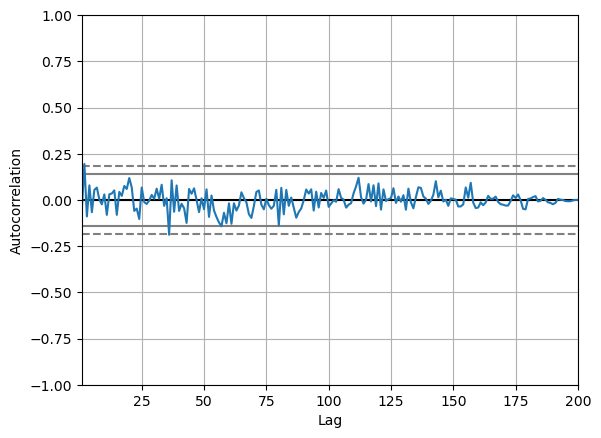

In [210]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

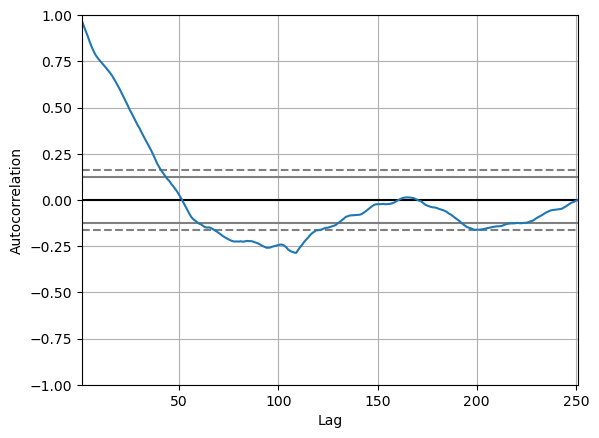

In [213]:
autocorrelation_plot(fb.close)

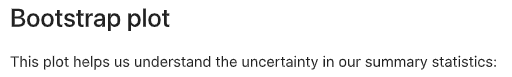

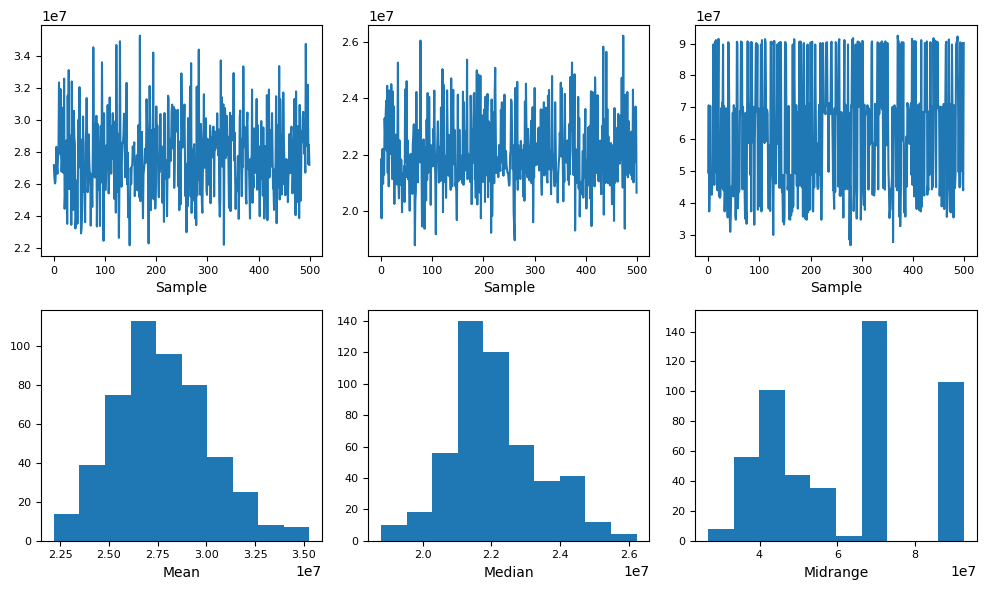

In [216]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb['fb_roll_20'] = fb['close'].rolling('20D').min()

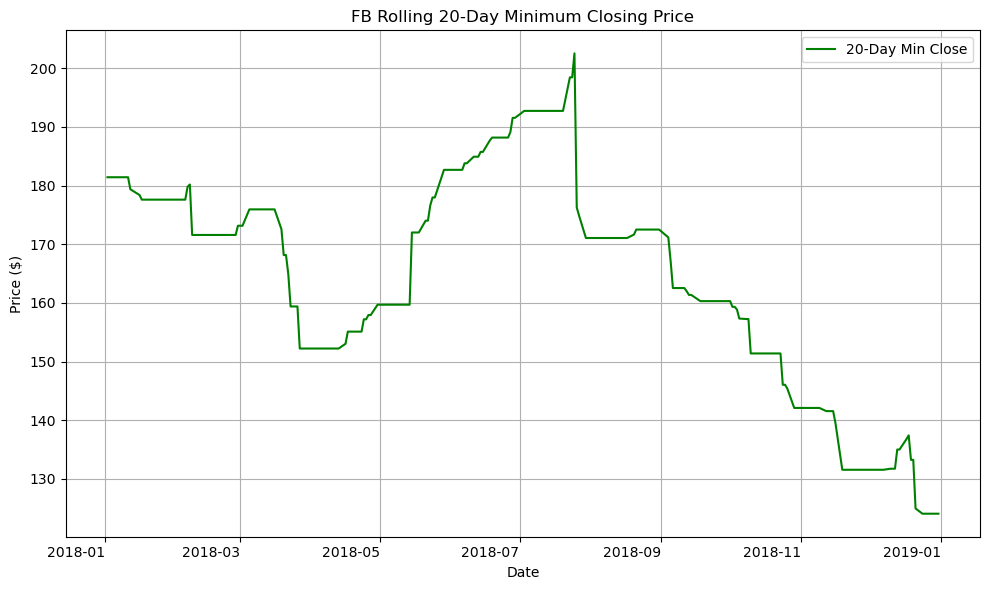

In [230]:
fig, ax = plt.subplots(figsize=(10, 6))

fb.plot(
    kind='line',
    y='fb_roll_20',
    style='green',
    ax=ax,
    title='FB Rolling 20-Day Minimum Closing Price',
)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend(['20-Day Min Close'])
ax.grid(True)

ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

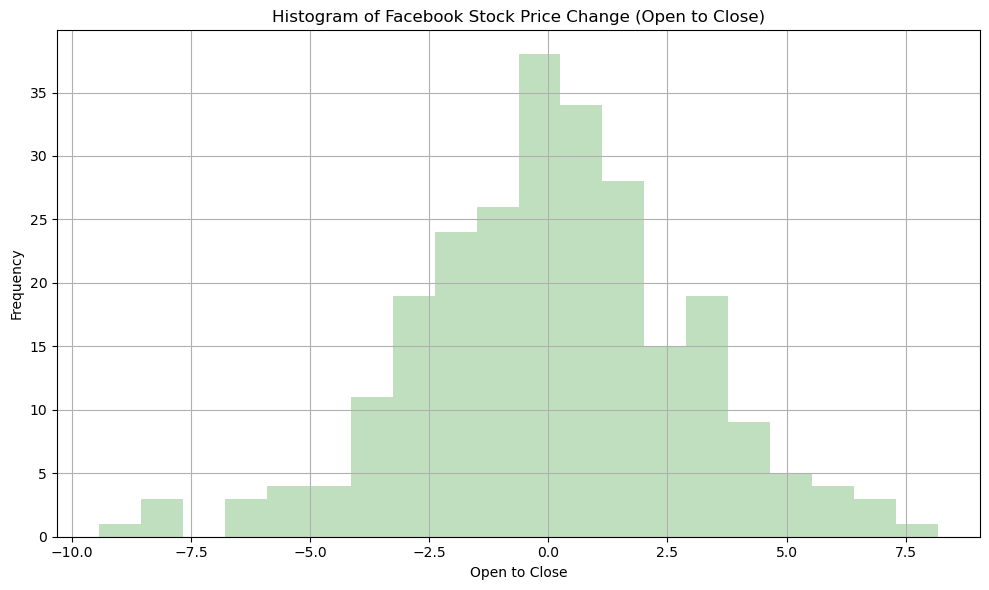

In [235]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Create the 'open_to_close' column
fb['open_to_close'] = fb['close'] - fb['open']

fb.open_to_close.plot(
    kind='hist',
    color='green',
    alpha=0.25,
    ax=ax,
    title='Histogram of Facebook Stock Price Change (Open to Close)',
    bins=20  
)

ax.set_xlabel('Open to Close')
ax.grid(True)

plt.tight_layout()
plt.show()

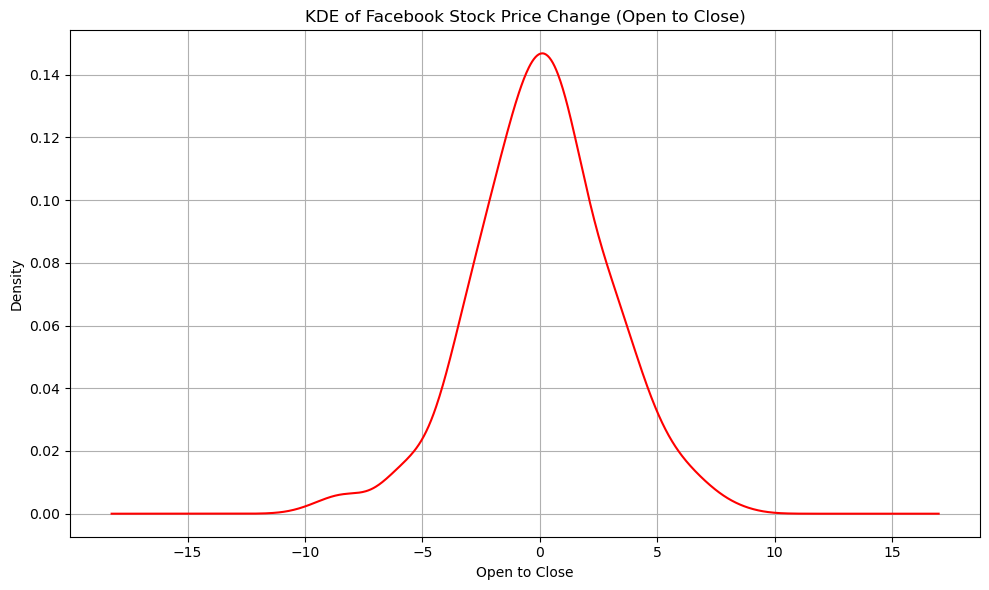

In [238]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE on the created axes
fb.open_to_close.plot(
    kind='kde',
    color='red',
    ax=ax,  # Use the ax created with plt.subplots()
    title='KDE of Facebook Stock Price Change (Open to Close)'
)

ax.set_xlabel('Open to Close')
ax.grid(True)

plt.tight_layout()
plt.show()

> The union of the histogram and KDE allows for better insight.

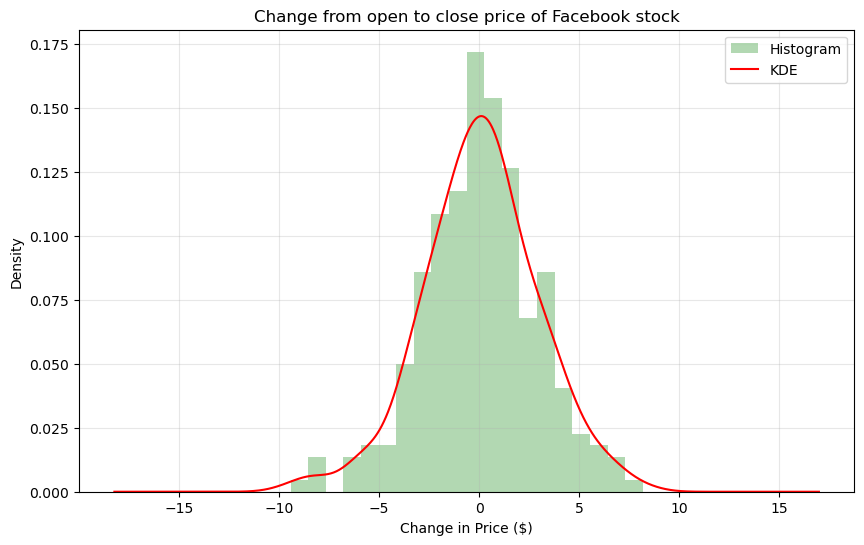

In [243]:
# Combine histogram and KDE into a single figure to allow direct visual comparison of distribution and density
fig, ax = plt.subplots(figsize=(10, 6))

fb['change'] = fb['close'] - fb['open']

# Plot the histogram 
fb['change'].plot(
    kind='hist',
    color='green',
    density=True,
    bins=20,
    alpha=0.3,
    ax=ax,
    title='Change from open to close price of Facebook stock'
)

# Plot the KDE
fb['change'].plot(
    kind='kde',
    color='red',
    ax=ax 
)

ax.set_xlabel('Change in Price ($)')
ax.legend(['Histogram', 'KDE'])
ax.grid(True, alpha=0.3)

plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [248]:
earthquakes = pd.read_csv('earthquakes-1.csv')
earthquakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [251]:
mag_indo = earthquakes.query('parsed_place == "Indonesia"')
mag_indo.head()

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia


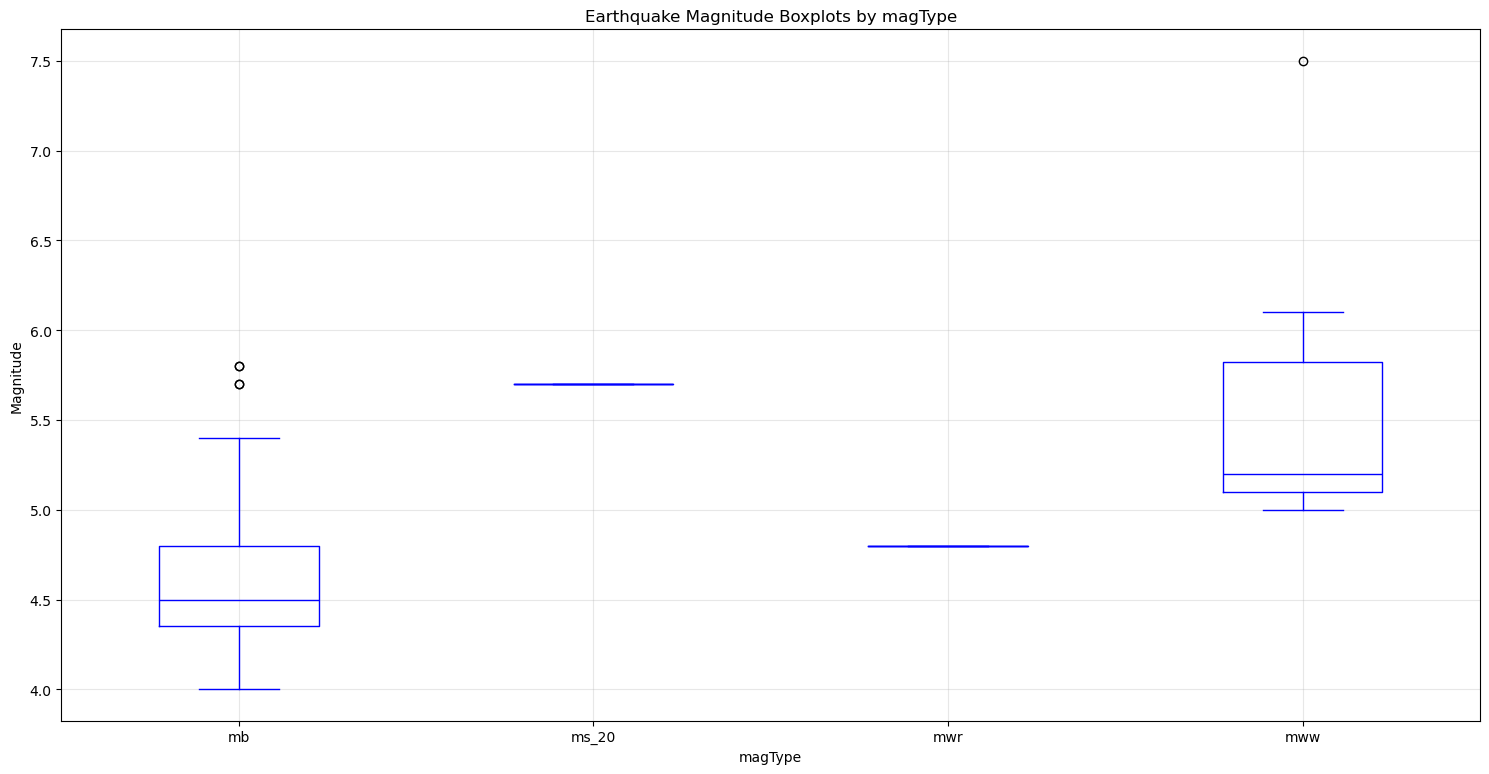

In [254]:
fig, ax = plt.subplots(figsize=(15, 8))

mag_indo.boxplot(
    column='mag',
    by='magType',
    color='blue',
    ax=ax
)

ax.set_title('Earthquake Magnitude Boxplots by magType')
ax.set_ylabel('Magnitude')
ax.grid(True, alpha = 0.3)
plt.suptitle('') 

# Show the plot
plt.tight_layout()
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

In [259]:
print("Maximum high price:", max(fb.high))

Maximum high price: 218.62


In [262]:
print("Minimum low price:", min(fb.low))

Minimum low price: 123.02


In [265]:
fb_diff = fb.resample('W').apply(
    lambda x: x['high'].max() - x['low'].min()
)
fb_diff

date
2018-01-07     9.3500
2018-01-14    11.5000
2018-01-21     6.5700
2018-01-28    10.2500
2018-02-04    13.4800
2018-02-11    23.4300
2018-02-18     8.6600
2018-02-25     8.2800
2018-03-04    12.6700
2018-03-11     9.6200
2018-03-18     4.9900
2018-03-25    18.1500
2018-04-01    13.8300
2018-04-08    11.0650
2018-04-15    12.6100
2018-04-22     5.6100
2018-04-29    20.9100
2018-05-06     7.8500
2018-05-13    11.2100
2018-05-20     5.6400
2018-05-27     4.7300
2018-06-03    10.8392
2018-06-10     8.5700
2018-06-17     8.4800
2018-06-24     9.7600
2018-07-01     7.6400
2018-07-08    11.4200
2018-07-15     6.6800
2018-07-22     6.6600
2018-07-29    45.6200
2018-08-05    12.2900
2018-08-12     9.9200
2018-08-19    10.5700
2018-08-26     4.6400
2018-09-02     5.0401
2018-09-09    13.8900
2018-09-16     6.8500
2018-09-23     8.3844
2018-09-30    10.8900
2018-10-07     9.6800
2018-10-14    11.4300
2018-10-21     7.9400
2018-10-28    13.5400
2018-11-04    17.3700
2018-11-11     8.9400
2018-

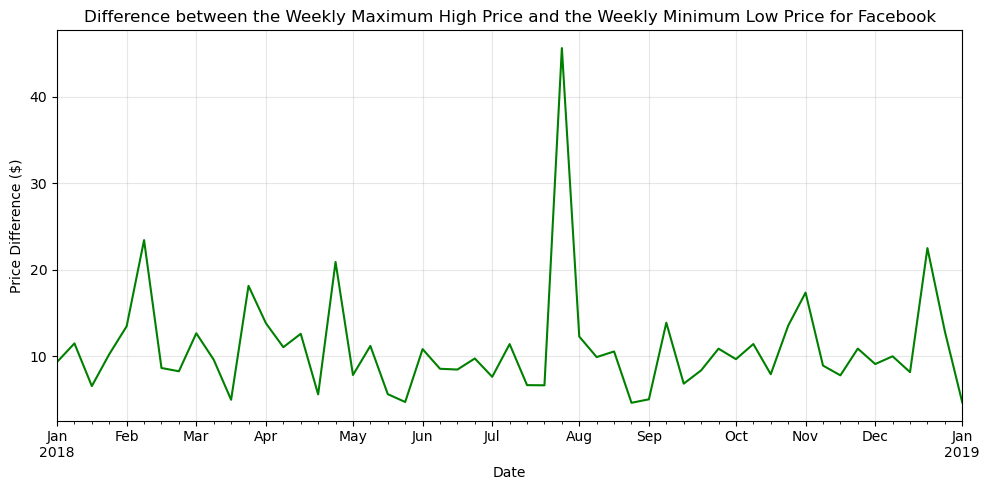

In [268]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot using the ax
fb_diff.plot(
    kind='line',
    y='max_high_min_low_diff',
    style='g-',           
    legend=False,
    ax=ax,                
    title='Difference between the Weekly Maximum High Price and the Weekly Minimum Low Price for Facebook'
)

ax.set_xlabel('Date')
ax.set_ylabel('Price Difference ($)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [273]:
fb.head()

,open,high,low,close,volume,fb_roll_20,open_to_close,change
date,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,181.42,3.74,3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,181.42,2.79,2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,181.42,-0.57,-0.57
2018-01-05,185.59,186.90,184.9300,186.85,13574535,181.42,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,181.42,1.08,1.08


In [276]:
fb['daily_diff_open_close'] = fb['open'] - fb['close'].shift(1)

fb

,open,high,low,close,volume,fb_roll_20,open_to_close,change,daily_diff_open_close
date,,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,181.42,3.74,3.74,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,181.42,2.79,2.79,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,181.42,-0.57,-0.57,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,181.42,1.26,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,181.42,1.08,1.08,0.35
...,...,...,...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,124.06,0.96,0.96,-1.85
2018-12-26,126.00,134.24,125.8900,134.18,39723370,124.06,8.18,8.18,1.94
2018-12-27,132.44,134.99,129.6700,134.52,31202509,124.06,2.08,2.08,-1.74


C:\Users\micki\AppData\Local\Temp\ipykernel_23048\1964583224.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_net_eff = fb.resample('M')['daily_diff_open_close'].sum()


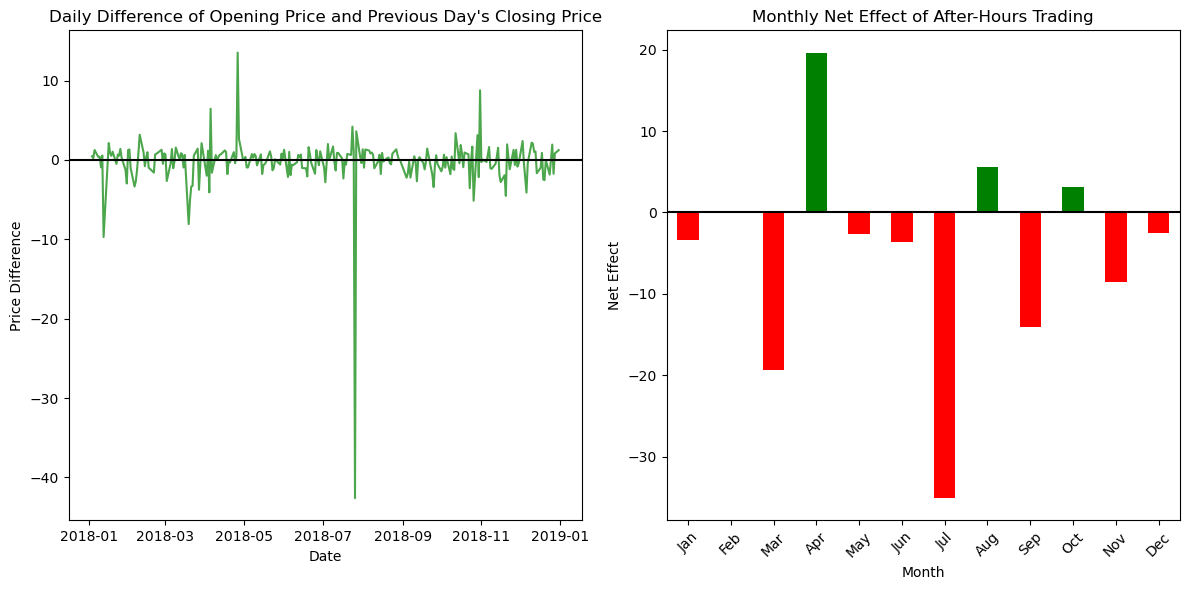

In [279]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Daily difference
axs[0].plot(fb.index, fb['daily_diff_open_close'], color='green', alpha=0.7)
axs[0].set_title('Daily Difference of Opening Price and Previous Day\'s Closing Price')
    
    # Label
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price Difference')
axs[0].axhline(0, color='black', linestyle='-')


# Plot 2: Monthly Net Effect as a bar plot
# Calculate monthly net effect using resample
monthly_net_eff = fb.resample('M')['daily_diff_open_close'].sum()

colors = ['green' if val >= 0 else 'red' for val in monthly_net_eff]  # green for gains, red for drops
monthly_net_eff.plot(kind='bar', ax=axs[1], color=colors)
axs[1].axhline(0, color='black', linestyle='-')

# Labels
axs[1].set_title('Monthly Net Effect of After-Hours Trading')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Net Effect')
    
    # Set the x-axis to show the month abbreviation
axs[1].set_xticks(range(len(monthly_net_eff)))  # Set positions for each month
axs[1].set_xticklabels([month.strftime('%b') for month in monthly_net_eff.index], rotation=45)

plt.tight_layout()
plt.show()

# Conclusion

> In this activity, I learned a lot about visualizing the obtained data. Although I felt a bit overwhelmed, I explored how after-hours trading affects Facebook’s stock price by calculating the daily difference between the opening price and the previous day’s close. This showed me how the price changes even when the market isn’t officially open.

> I chose to use ax for plotting because it gave me more control over the layout and styling. It’s also something I remembered from our VDA class, so it felt familiar and flexible for combining multiple plots in one figure.

> I then used resampling to see the bigger picture, looking at how these daily changes added up each month. Plotting the results helped me clearly see when Facebook’s stock gained or dropped—especially with green bars for gains and red for losses.

> Before, I learned how to individually create figures, but today it was expounded by learning to combine both --- cause before I can only do it using Tableau. With that, it was useful in comparing stock changes.

> In the end, this activity helped me understand both the technical side of data visualization and the real-world impact of trading behavior.